<a href="https://colab.research.google.com/github/TayyabKhan54/Machine-learning-project-/blob/main/machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total number of samples: 1797
Total number of features: 64


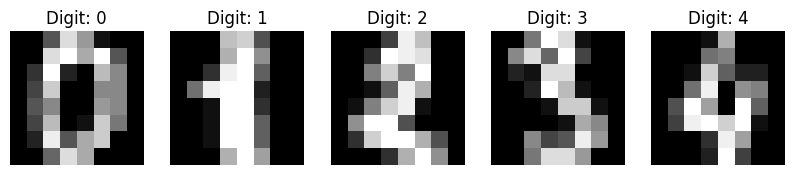

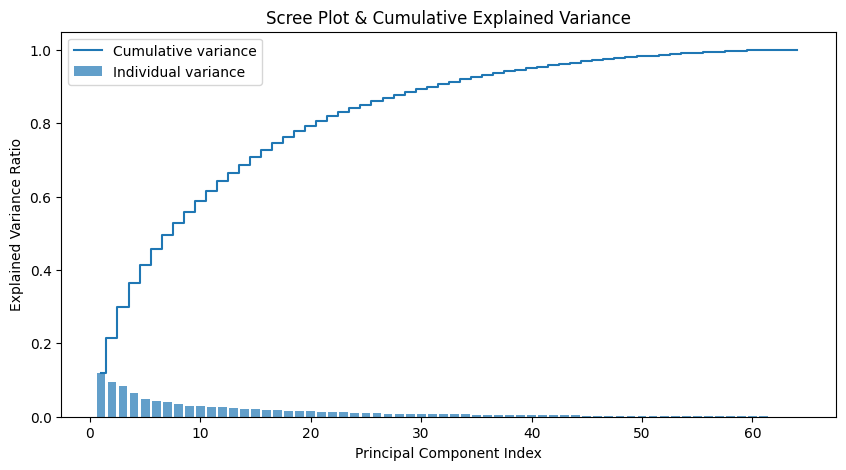

Components for 90% variance: 31
Components for 95% variance: 40
Original features: 64
Reduced features (95% Var): 40
Reduction Percentage: 37.50%
MSE at 90% Variance: 0.0949
MSE at 95% Variance: 0.0469


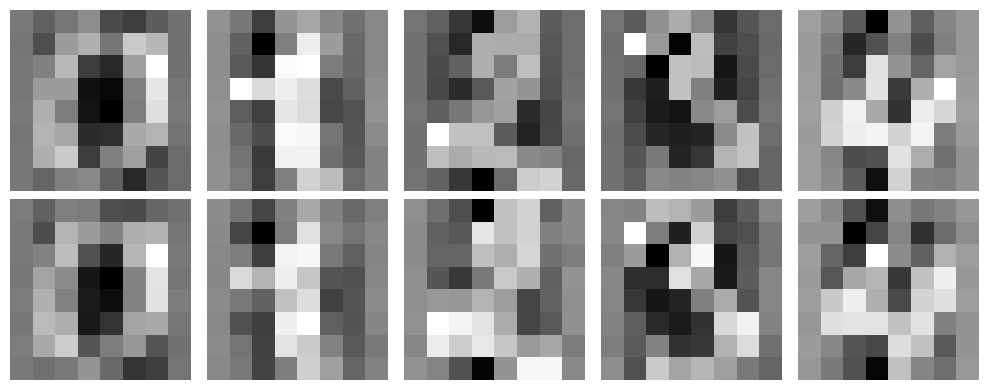

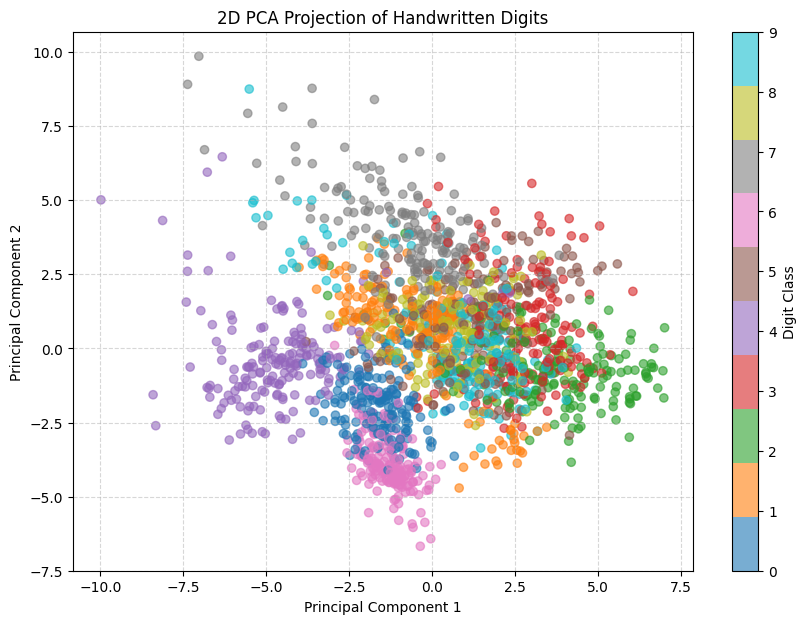

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# --- Part 1: Data Inspection ---

# Load the digits dataset (8x8 images)
digits = load_digits()
X = digits.data  # Feature matrix
y = digits.target # Target labels

# Report dataset dimensions
n_samples, n_features = X.shape
print(f"Total number of samples: {n_samples}")
print(f"Total number of features: {n_features}")

# Display at least 5 sample digit images
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    # Reshape the 64-vector back to 8x8 for viewing
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(f"Digit: {y[i]}")
    plt.axis('off')
plt.show()

# --- Part 2: PCA Analysis ---

# Apply feature scaling (PCA is sensitive to variances of the initial variables)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA on the dataset (fitting all components initially)
pca_full = PCA()
pca_full.fit(X_scaled)

# Extract explained variance ratio
evr = pca_full.explained_variance_ratio_
cumulative_evr = np.cumsum(evr)

# Plot Scree plot (Individual Variance)
plt.figure(figsize=(10, 5))
plt.bar(range(1, n_features + 1), evr, alpha=0.7, label='Individual variance')
plt.step(range(1, n_features + 1), cumulative_evr, where='mid', label='Cumulative variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot & Cumulative Explained Variance')
plt.legend()
plt.show()

# Determine minimum components retaining 90% and 95% variance
n_90 = np.argmax(cumulative_evr >= 0.90) + 1
n_95 = np.argmax(cumulative_evr >= 0.95) + 1

print(f"Components for 90% variance: {n_90}")
print(f"Components for 95% variance: {n_95}")

# --- Part 3: Dimensionality Reduction ---

# Reduce dataset to 95% variance components as a primary example
pca_reduced = PCA(n_components=n_95)
X_pca = pca_reduced.fit_transform(X_scaled)

# Report dimensionality reduction statistics
reduced_features = X_pca.shape[1]
reduction_pct = (1 - (reduced_features / n_features)) * 100

print(f"Original features: {n_features}")
print(f"Reduced features (95% Var): {reduced_features}")
print(f"Reduction Percentage: {reduction_pct:.2f}%")

# --- Part 4: Reconstruction Error ---

def get_reconstruction_error(n_comp, original_data):
    # Perform PCA reduction
    pca = PCA(n_components=n_comp)
    X_low_dim = pca.fit_transform(original_data)
    # Reconstruct data back to 64 dimensions
    X_reconstructed = pca.inverse_transform(X_low_dim)
    # Calculate Mean Squared Error
    mse = mean_squared_error(original_data, X_reconstructed)
    return mse, X_reconstructed

# Calculate errors for both cases
error_90, recon_90 = get_reconstruction_error(n_90, X_scaled)
error_95, recon_95 = get_reconstruction_error(n_95, X_scaled)

print(f"MSE at 90% Variance: {error_90:.4f}")
print(f"MSE at 95% Variance: {error_95:.4f}")

# Display original vs reconstructed digit images (using 95% variance case)
plt.figure(figsize=(10, 4))
for i in range(5):
    # Original (Scaled)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_scaled[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    if i == 0: plt.ylabel('Original')

    # Reconstructed
    plt.subplot(2, 5, i + 6)
    plt.imshow(recon_95[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
    if i == 0: plt.ylabel('Reconstructed')
plt.tight_layout()
plt.show()

# --- Part 5: Visualization ---

# Project into 2D (PC1 vs PC2)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='tab10', alpha=0.6)
plt.colorbar(scatter, label='Digit Class')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Handwritten Digits')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()